In [1]:
import gymnasium as gym
import numpy as np
import random
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
desc=["SFFF", "FHHH", "FFFF", "HFHF", "FFGF"]

env = gym.make('FrozenLake-v1', desc=desc, map_name="5x5", is_slippery=False) 
observation, info = env.reset()

In [3]:
def calculate_percentage_change(old_q_table, new_q_table):
    """
    Calculate the percentage change in Q-values between two Q-tables.

    Parameters:
        old_q_table (numpy.ndarray): The old Q-table.
        new_q_table (numpy.ndarray): The new Q-table.

    Returns:
        float: The percentage change in Q-values.
    """
    q_diff = np.abs(new_q_table - old_q_table)
    avg_change = np.mean(q_diff)
    old_avg = np.mean(old_q_table)
    return (avg_change / old_avg) * 100

In [4]:
# Define parameters
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.01  # Epsilon-greedy parameter
num_episodes = 5000

# Initialize Q-values
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

statistics = pd.DataFrame({
    "Time": [],
    "Episode": [],
    "Q-Difference": [],
    "GotGift": []
})

# Q-learning algorithm
start_time = time.time()
for episode in range(num_episodes):
    state = env.reset()[0]
    done = False
    
    gotGift = False
    
    steps = []
    
    arr_copy = Q.copy()
    
    while not done:
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Random action
        else:
            action = np.argmax(Q[state])  # Greedy action
        
        # Take action and observe next state and reward
        steps.append(action)
        step = env.step(action)
        next_state = step[0]
        reward = step[1]
        done = step[2]
        
        if reward == 0 and done:
            reward = -1
        elif next_state == state:
            reward = -1
            
        
        
        # Update Q-value
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        
        if reward == 1:
            print("Hit gift! At Episode: "+str(episode +1))
#             print(Q)
#             print("Steps: ")
#             print(steps)
            gotGift = True
            end_time = time.time()
            elapsed_time = end_time - start_time
            print("Elapsed time:", elapsed_time, "seconds")
            
        
        # Move to next state
        state = next_state
        
    change = calculate_percentage_change(arr_copy, Q)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    statistics.loc[episode] = {
        "Time": elapsed_time,
        "Episode": episode+1,
        "Q-Difference": -change,
        "GotGift": gotGift
    }
    
    print(change)
    if change == 0:
        print("breaking")
        break

# Optimal policy
optimal_policy = np.argmax(Q, axis=1)

print("Optimal policy:")
print(optimal_policy)


C:\Users\greyes11\AppData\Local\Temp\ipykernel_4324\1108856074.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return (avg_change / old_avg) * 100


inf
-67.75000000000001
-25.767511177347245
-18.439388553146106
-8.103970945763427
-12.21173334814116
-5.41131700123468
-23.4729110869601
Hit gift! At Episode: 9
Elapsed time: 0.03600001335144043 seconds
-29.21291781284595
-5.437533882633005
Hit gift! At Episode: 11
Elapsed time: 0.0390009880065918 seconds
-5.105542917761049
-4.891120930791181
Hit gift! At Episode: 13
Elapsed time: 0.04300045967102051 seconds
-5.078056794860702
Hit gift! At Episode: 14
Elapsed time: 0.04400062561035156 seconds
-5.296221355316615
Hit gift! At Episode: 15
Elapsed time: 0.04500079154968262 seconds
-8.599114562401287
Hit gift! At Episode: 16
Elapsed time: 0.04600095748901367 seconds
-5.620153031359238
Hit gift! At Episode: 17
Elapsed time: 0.04700064659118652 seconds
-5.8952716486060694
Hit gift! At Episode: 18
Elapsed time: 0.04700064659118652 seconds
-6.2019210560706926
Hit gift! At Episode: 19
Elapsed time: 0.04800057411193848 seconds
-6.545807508980098
Hit gift! At Episode: 20
Elapsed time: 0.0490007400

0.0006720869294680977
Hit gift! At Episode: 186
Elapsed time: 0.2310018539428711 seconds
0.0006222433049696159
Hit gift! At Episode: 187
Elapsed time: 0.2330021858215332 seconds
0.0005759850417725961
3.792299279614333
Hit gift! At Episode: 189
Elapsed time: 0.235001802444458 seconds
0.0005126961195772799
Hit gift! At Episode: 190
Elapsed time: 0.23600172996520996 seconds
0.0004743169175414458
Hit gift! At Episode: 191
Elapsed time: 0.23700165748596191 seconds
1.2203695280078664
Hit gift! At Episode: 192
Elapsed time: 0.23800206184387207 seconds
0.0004107556576974365
Hit gift! At Episode: 193
Elapsed time: 0.23900151252746582 seconds
0.0003798060170950037
Hit gift! At Episode: 194
Elapsed time: 0.24100184440612793 seconds
0.0003511283661899004
Hit gift! At Episode: 195
Elapsed time: 0.24200177192687988 seconds
0.00032456149420864597
Hit gift! At Episode: 196
Elapsed time: 0.24300146102905273 seconds
0.0002999551056564417
Hit gift! At Episode: 197
Elapsed time: 0.2440013885498047 seconds

1.8038773290595727
Hit gift! At Episode: 410
Elapsed time: 0.46900320053100586 seconds
1.3653755961063778
Hit gift! At Episode: 411
Elapsed time: 0.470003604888916 seconds
1.7888883766328064e-12
Hit gift! At Episode: 412
Elapsed time: 0.47100329399108887 seconds
1.6262621605752497e-12
Hit gift! At Episode: 413
Elapsed time: 0.4720034599304199 seconds
1.4761456534452022e-12
Hit gift! At Episode: 414
Elapsed time: 0.4730033874511719 seconds
1.3468786611943316e-12
Hit gift! At Episode: 415
Elapsed time: 0.47400331497192383 seconds
1.2259514748951333e-12
Hit gift! At Episode: 416
Elapsed time: 0.4750032424926758 seconds
1.1133640945476074e-12
Hit gift! At Episode: 417
Elapsed time: 0.47600340843200684 seconds
1.0174563261034203e-12
Hit gift! At Episode: 418
Elapsed time: 0.4770033359527588 seconds
9.257184606350695e-13
Hit gift! At Episode: 419
Elapsed time: 0.47800350189208984 seconds
8.42320401118389e-13
Hit gift! At Episode: 420
Elapsed time: 0.4790034294128418 seconds
7.672621475533774

In [5]:
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Elapsed time: 0.5449118614196777 seconds


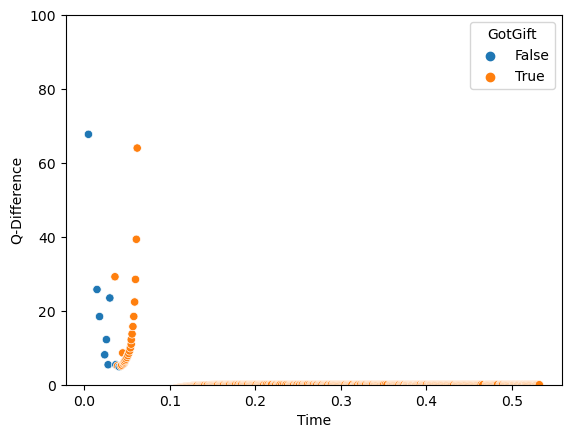

In [6]:
# Create the scatter plot
sns.scatterplot(data=statistics, x="Time", y="Q-Difference", hue="GotGift")

# Set the limits of x and y axes
plt.ylim(0, 100)

# Show the plot
plt.show()

In [7]:
statistics.to_csv("trial_5.csv")